In [173]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [267]:
preds_init = np.load("./real_experiment/preds_calibrate.npy")

In [142]:
# center = np.vstack([preds[:90], preds[31*30:32 *30]])
# right_top = np.vstack([preds[3*30:5*30]])
# center_top = np.vstack([preds[8*30:11*30]])
# left_top = np.vstack([preds[13*30:15*30]])
# left_bottom = np.vstack([preds[17*30:19*30]])
# center_bottom = np.vstack([preds[22*30:24*30]])
# right_bottom = np.vstack([preds[27*30:29*30]])

In [143]:
# features = np.vstack([center, right_top, center_top, left_top, left_bottom, center_bottom, right_bottom])

In [144]:
# len(features)

In [145]:
# labels = np.vstack([
#     [[0.5, 0.5]] * len(center),
#     [[0.0, 0.0]] * len(right_top),
#     [[0.5, 0.0]] * len(center_top),
#     [[1.0, 0.0]] * len(left_top),
#     [[1.0, 1.0]] * len(left_bottom),
#     [[0.5, 1.0]] * len(center_bottom),
#     [[0.0, 1.0]] * len(right_bottom),
# ])

In [268]:
df = pd.read_csv(
    "./real_experiment/points_calibrate.txt",
    sep = " ",
    header=None
)

In [269]:
cols = [
    "timestamp", "x_gt", "y_gt", "x1", "y1",
    "x2", "y2", "screen_w", "screen_h"
]
df.columns = cols
df["x_gt_norm"] = df["x_gt"] / df["screen_w"]
df["y_gt_norm"] = df["y_gt"] / df["screen_h"]

df["pred_x"] = preds_init.T[0]
df["pred_y"] = preds_init.T[1]
df["timestamp"] = df["timestamp"].apply(str)
df.tail()

,timestamp,x_gt,y_gt,x1,y1,x2,y2,screen_w,screen_h,x_gt_norm,y_gt_norm,pred_x,pred_y
79,1696961028.37805,1257,760,1177,680,1337,840,2474,1520,0.508084,0.500000,0.638194,0.255747
80,1696961029.211155,1257,760,1177,680,1337,840,2474,1520,0.508084,0.500000,0.313133,0.305665
81,1696961029.949162,1257,760,1177,680,1337,840,2474,1520,0.508084,0.500000,0.516291,0.214251
82,1696961030.672824,1220,1203,1140,1123,1300,1283,2474,1520,0.493129,0.791447,0.481571,0.410854
83,1696961031.244009,1220,1203,1140,1123,1300,1283,2474,1520,0.493129,0.791447,0.388626,0.401946


In [270]:
df["pred_x_rescaled"] = (df["pred_x"] - df["pred_x"].min()) / (df["pred_x"].max() - df["pred_x"].min())
df["pred_y_rescaled"] = (df["pred_y"] - df["pred_y"].min()) / (df["pred_y"].max() - df["pred_y"].min())

In [271]:
df[["timestamp"] + list(df.columns[-6:])].head(50)

,timestamp,x_gt_norm,y_gt_norm,pred_x,pred_y,pred_x_rescaled,pred_y_rescaled
0,1696960969.73924,0.990299,0.012500,0.686904,0.199886,0.822293,0.211460
1,1696960970.668782,0.987065,0.013158,0.703043,0.200478,0.843222,0.212701
2,1696960971.368164,0.984640,0.013158,0.807764,0.121376,0.979025,0.046949
3,1696960972.1679192,0.987470,0.012500,0.823939,0.145327,1.000000,0.097136
4,1696960972.901477,0.985853,0.021053,0.679514,0.319461,0.812709,0.462018
5,1696960973.501715,0.986661,0.021053,0.753077,0.128604,0.908106,0.062095
6,1696960974.16706,0.986661,0.021053,0.724750,0.233481,0.871372,0.281855
7,1696960974.9665549,0.986661,0.021053,0.780598,0.409573,0.943795,0.650840
8,1696960975.665941,0.874293,0.019079,0.618338,0.271887,0.733376,0.362333
9,1696960978.332572,0.515360,0.007237,0.557710,0.098970,0.654753,0.000000


In [235]:
df_ = df[(df["pred_y"] > df["pred_y"].median() - df["pred_y"].std()) & (df["pred_y"] < df["pred_y"].median() + df["pred_y"].std())]

In [236]:
df_.shape

(66, 15)

In [272]:
features = df_[["pred_x", "pred_y"]].values
labels = df_[["x_gt_norm", "y_gt_norm"]].values

In [273]:
train_x, test_x, train_y, test_y, = train_test_split(
    features,
    labels, 
    test_size = 0.1, random_state=42, shuffle=True
)

In [274]:
reg = Ridge(alpha = 0.1)

In [275]:
reg.fit(train_x, train_y)

Ridge(alpha=0.1)

In [276]:
preds = reg.predict(test_x)

In [277]:
pd.concat([pd.DataFrame(test_x), pd.DataFrame(preds), pd.DataFrame(test_y)], axis = 1) 

,0,1,0,1,0,1
0,0.661206,0.440876,0.670036,0.728514,0.717462,0.978947
1,0.655220,0.294197,0.652455,0.308492,0.508084,0.500000
2,0.745589,0.313584,0.761898,0.330039,0.990299,0.012500
3,0.164106,0.445546,0.075926,0.930456,0.198464,0.965132
4,0.734526,0.330715,0.749886,0.383554,0.986661,0.021053
5,0.652613,0.339149,0.652531,0.438898,0.508084,0.500000
6,0.628351,0.254745,0.617521,0.205098,0.518189,0.013816


In [278]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

# define the model/ estimator
model = Ridge(random_state=42)

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5, verbose = 3)

#fit the grid search
Ridge_reg.fit(train_x, train_y)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(train_x, train_y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ........................alpha=0.0;, score=-0.032 total time=   0.0s
[CV 2/5] END ........................alpha=0.0;, score=-0.065 total time=   0.0s
[CV 3/5] END ........................alpha=0.0;, score=-0.039 total time=   0.0s
[CV 4/5] END ........................alpha=0.0;, score=-0.045 total time=   0.0s
[CV 5/5] END ........................alpha=0.0;, score=-0.040 total time=   0.0s
[CV 1/5] END .......................alpha=0.05;, score=-0.035 total time=   0.0s
[CV 2/5] END .......................alpha=0.05;, score=-0.060 total time=   0.0s
[CV 3/5] END .......................alpha=0.05;, score=-0.042 total time=   0.0s
[CV 4/5] END .......................alpha=0.05;, score=-0.047 total time=   0.0s
[CV 5/5] END .......................alpha=0.05;, score=-0.043 total time=   0.0s
[CV 1/5] END ........................alpha=0.1;, score=-0.037 total time=   0.0s
[CV 2/5] END ........................alpha=0.1;, 

Ridge(alpha=0.0, random_state=42)

In [279]:
preds = best_model.predict(test_x)

In [280]:
pd.concat([pd.DataFrame(test_x), pd.DataFrame(preds), pd.DataFrame(test_y)], axis = 1) 

,0,1,0,1,0,1
0,0.661206,0.440876,0.680228,0.842819,0.717462,0.978947
1,0.655220,0.294197,0.660499,0.288406,0.508084,0.500000
2,0.745589,0.313584,0.773004,0.324836,0.990299,0.012500
3,0.164106,0.445546,0.070760,1.065026,0.198464,0.965132
4,0.734526,0.330715,0.760878,0.394426,0.986661,0.021053
5,0.652613,0.339149,0.661096,0.460142,0.508084,0.500000
6,0.628351,0.254745,0.624204,0.149677,0.518189,0.013816


In [281]:
mean_squared_error(labels, features, squared=False)

0.2513602013930669

In [282]:
mean_squared_error(test_y, preds, squared=False)

0.18738872300372372

In [283]:
preds_tr = best_model.predict(train_x)

In [284]:
mean_squared_error(train_y, preds_tr, squared=False)

0.18298228744984368

In [285]:
reg = Ridge(alpha = 0.0)

In [286]:
reg.fit(features, labels)

Ridge(alpha=0.0)

In [2]:
import pickle

In [287]:
filename = './weights/calibr_model_misha_test.pckl'
pickle.dump(reg, open(filename, 'wb'))

In [549]:
preds_init = np.load("./real_experiment/preds_test_rescaled_clip.npy")

In [550]:
df = pd.read_csv(
    "./real_experiment/points_test.txt",
    sep = " ",
    header=None
)

In [551]:
cols = [
    "timestamp", "x_gt", "y_gt", "x1", "y1",
    "x2", "y2", "screen_w", "screen_h"
]
df.columns = cols
df["x_gt_norm"] = df["x_gt"] / df["screen_w"]
df["y_gt_norm"] = df["y_gt"] / df["screen_h"]

df["pred_x"] = preds_init.T[0]
df["pred_y"] = preds_init.T[1]
df["timestamp"] = df["timestamp"].apply(str)
df.tail()

,timestamp,x_gt,y_gt,x1,y1,x2,y2,screen_w,screen_h,x_gt_norm,y_gt_norm,pred_x,pred_y
33,1696961225.748456,1249,796,1169,716,1329,876,2474,1520,0.504850,0.523684,0.386204,0.921808
34,1696961227.548629,1662,799,1582,719,1742,879,2474,1520,0.671787,0.525658,0.642514,0.736559
35,1696961229.581525,875,809,795,729,955,889,2474,1520,0.353678,0.532237,0.136068,0.805295
36,1696961231.7148569,362,783,282,703,442,863,2474,1520,0.146322,0.515132,0.081732,0.620226
37,1696961234.111628,2162,798,2082,718,2242,878,2474,1520,0.873888,0.525000,0.752145,0.748182


In [174]:
df = pd.read_csv("./real_experiment/res_calibration_unfreezed_guys_cleaned_weighted_loss_more_compl_more_augm.csv")
df["x_gt_norm"] = df["x_gt"] / df["screen_w"]
df["y_gt_norm"] = df["y_gt"] / df["screen_h"]
df.tail()

,paths,timestamp,x_gt,y_gt,x1,y1,x2,y2,screen_w,screen_h,x_normalized,y_normalized,participant_name,pred_x,pred_y,x_gt_norm,y_gt_norm
128,/home/ubuntu/projects/tweakle/gaze_detection/r...,1.697650e+09,2251,628,2171,548,2331,708,2474,1520,0.909863,0.413158,marina,0.657102,0.597582,0.909863,0.413158
129,/home/ubuntu/projects/tweakle/gaze_detection/r...,1.697650e+09,1035,690,955,610,1115,770,2474,1520,0.418351,0.453947,marina,0.444815,0.782387,0.418351,0.453947
130,/home/ubuntu/projects/tweakle/gaze_detection/r...,1.697650e+09,1807,1282,1727,1202,1887,1362,2474,1520,0.730396,0.843421,marina,0.688880,0.929222,0.730396,0.843421
131,/home/ubuntu/projects/tweakle/gaze_detection/r...,1.697650e+09,2086,105,2006,25,2166,185,2474,1520,0.843169,0.069079,marina,0.839357,0.085665,0.843169,0.069079
132,/home/ubuntu/projects/tweakle/gaze_detection/r...,1.697650e+09,2413,46,2333,0,2474,126,2474,1520,0.975344,0.030263,marina,1.000000,0.021734,0.975344,0.030263


In [175]:
# df["pred_x_rescaled"] = (df["pred_x"] - df["pred_x"].min()) / (df["pred_x"].max() - df["pred_x"].min())
# df["pred_y_rescaled"] = (df["pred_y"] - df["pred_y"].min()) / (df["pred_y"].max() - df["pred_y"].min())

In [176]:
df[["timestamp"] + list(df.columns[-4:])].head(30)

,timestamp,pred_x,pred_y,x_gt_norm,y_gt_norm
0,1.697650e+09,0.676837,0.021084,0.745756,0.241447
1,1.697650e+09,0.721071,0.892524,0.995554,0.893421
2,1.697650e+09,0.331092,0.843243,0.345190,0.882237
3,1.697650e+09,0.687229,0.870568,0.892886,0.740132
4,1.697650e+09,0.651172,0.661519,0.897736,0.436842
5,1.697650e+09,0.470777,0.802591,0.601859,0.347368
6,1.697650e+09,0.129853,0.793963,0.232821,0.886842
7,1.697650e+09,0.465833,0.833134,0.636621,0.451974
8,1.697650e+09,0.580020,0.573822,0.705335,0.386842
9,1.697650e+09,0.575506,0.907346,0.785368,0.836842


In [177]:
features = df[["pred_x", "pred_y"]].values
labels = df[["x_gt_norm", "y_gt_norm"]].values

In [179]:
mean_squared_error(labels, features, squared=False)

0.18052104271359753

In [180]:
df["pred_x_abs"] = df["pred_x"] * df["screen_w"]
df["pred_y_abs"] = df["pred_y"] * df["screen_h"]

In [181]:
width_screen_cm, height_screen_cm = 28.5, 18.
df["pred_x_abs_cm"] = df["pred_x"] * width_screen_cm
df["pred_y_abs_cm"] = df["pred_y"] * height_screen_cm
df["x_gt_cm"] = df["x_gt_norm"] * width_screen_cm
df["y_gt_cm"] = df["y_gt_norm"] * height_screen_cm

In [182]:
max_error_x = df["screen_w"].values[0] / width_screen_cm * 2 * np.sqrt(2)
max_error_y = df["screen_h"].values[0] / height_screen_cm * 2 * np.sqrt(2)
bbox_size = np.mean([round(max_error_x), round(max_error_y)])
bbox_size

242.5

In [183]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [184]:
from shapely.geometry import box

In [185]:
def iou(gt_point, point, screen_dims, bbox_size = bbox_size):
    x1, y1 = max(point[0] - bbox_size / 2, 0), max(point[1] - bbox_size / 2, 0)
    x2, y2 = min(point[0] + bbox_size / 2, screen_dims[0]), min(point[1] + bbox_size / 2, screen_dims[1])
    box_pred = [x1, y1, x2, y2]
    x1, y1 = max(gt_point[0] - bbox_size / 2, 0), max(gt_point[1] - bbox_size / 2, 0)
    x2, y2 = min(gt_point[0] + bbox_size / 2, screen_dims[0]), min(gt_point[1] + bbox_size / 2, screen_dims[1])
    gt_bbox = [x1, y1, x2, y2]
    box_1 = box(*gt_bbox)
    box_2 = box(*box_pred)
    intersect = box_1.intersection(box_2).area
    union = box_1.union(box_2).area
    if intersect == 0:
        return 0.0
    if (intersect == box_1.area) or (intersect == box_2.area):
        return 1.0
    iou = intersect / union
    return iou

iou([0.5, 0.5], (2,2), (10, 10), 3)

0.20930232558139536

In [186]:
def in_bbox(gt_point, point, screen_dims, bbox_size = bbox_size):
    x1, y1 = max(gt_point[0] - bbox_size / 2, 0), max(gt_point[1] - bbox_size / 2, 0)
    x2, y2 = min(gt_point[0] + bbox_size / 2, screen_dims[0]), min(gt_point[1] + bbox_size / 2, screen_dims[1])
    cond1 = x1 <= point[0] <= x2
    cond2 = y1 <= point[1] <= y2
    # print(x1, y1, x2, y2)
    # print(point)
    # print(cond1, cond2)
    return int(cond1 and cond2)

in_bbox([0.4, 0.4], (0.5,0.5), (10, 10),1)

1

In [188]:
df["distances"] = df[['x_gt', 'y_gt', 'pred_x_abs', 'pred_y_abs']].apply(lambda x: distance(*x), axis = 1)
df["distances"].mean(), df["distances"].median()

(439.3881028961587, 442.17727887518663)

In [190]:
df["distances_cm"] = df[['x_gt_cm', 'y_gt_cm', 'pred_x_abs_cm', 'pred_y_abs_cm']].apply(lambda x: distance(*x), axis = 1)
df["distances_cm"].mean(), df["distances_cm"].median()

(5.125273631750212, 5.155819103129585)

In [193]:
df["distances_cm_x"] = df[['x_gt_cm', 'pred_x_abs_cm']].apply(lambda x: np.abs(x[0] - x[1]), axis = 1)
df["distances_cm_y"] = df[['y_gt_cm', 'pred_y_abs_cm']].apply(lambda x: np.abs(x[0] - x[1]), axis = 1)
df["distances_cm_x"].mean(), df["distances_cm_y"].mean()

(3.4567173219345695, 3.0957036373235938)

In [195]:
df["iou"] = df[['x_gt', 'y_gt',
                'pred_x_abs', 'pred_y_abs',
                'screen_w', 'screen_h'
               ]].apply(lambda x: iou(x[:2].values, x[2:4].values, x[4:].values), axis = 1)
df["iou"].mean()

/opt/tensorflow/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


0.05806906167788519

In [196]:
# df.sort_values("distances")[['x_gt', 'y_gt',
#                 'pred_x_abs', 'pred_y_abs',
#                  'screen_w', 'screen_h',
#                ]].apply(lambda x: in_bbox(x[:2].values, x[2:4].values, x[4:].values), axis = 1)

In [198]:
df["in_bbox"] = df[['x_gt', 'y_gt',
                'pred_x_abs', 'pred_y_abs',
                'screen_w', 'screen_h'
               ]].apply(lambda x: in_bbox(x[:2].values, x[2:4].values, x[4:].values), axis = 1)
df["in_bbox"].mean()

0.09022556390977443

In [199]:
# df = df.set_index("timestamp")

In [202]:
df.sort_values("distances")[[
    'x_gt', 'y_gt', 'pred_x_abs',
    'pred_y_abs', 'distances', 'distances_cm',
    #'distances_cm_x', 'distances_cm_y', 
    'iou', 'in_bbox'
]].tail(40)

,x_gt,y_gt,pred_x_abs,pred_y_abs,distances,distances_cm,iou,in_bbox
92,2266,1018,1810.886902,1338.334169,556.544618,6.471261,0.0,0
71,1576,684,1281.953187,1157.220057,557.136205,6.548142,0.0,0
117,1871,1281,1309.995176,1475.743216,593.844536,6.861813,0.0,0
24,1103,307,689.333272,734.342576,594.762002,6.951165,0.0,0
94,1954,972,1385.340901,795.227587,595.501181,6.877186,0.0,0
116,1903,1171,1406.243879,1520.000000,607.097721,7.058910,0.0,0
11,1893,792,1313.633117,976.427307,608.012678,7.022447,0.0,0
68,1983,1490,1379.571829,1398.021497,610.397906,7.036194,0.0,0
122,1798,720,1321.576378,1105.345085,612.756316,7.137591,0.0,0
91,2211,875,1723.686232,1247.627774,613.454291,7.140462,0.0,0


In [201]:
df[df["distances_cm"] <= 2].shape[0] / df.shape[0]

0.14285714285714285

In [132]:
df[df["distances_cm"] <= 3].shape[0] / df.shape[0]

0.5338345864661654

In [367]:
import cv2
import matplotlib.pyplot as plt

i1 = "1696961209.1260989"
i2 = "1696961211.826169"
img1 = cv2.imread(f"./real_experiment/frames_test/{i1}.png")
img1 = img1[:,:,::-1]
img2 = cv2.imread(f"./real_experiment/frames_test/{i2}.png")
img2 = img2[:,:,::-1]

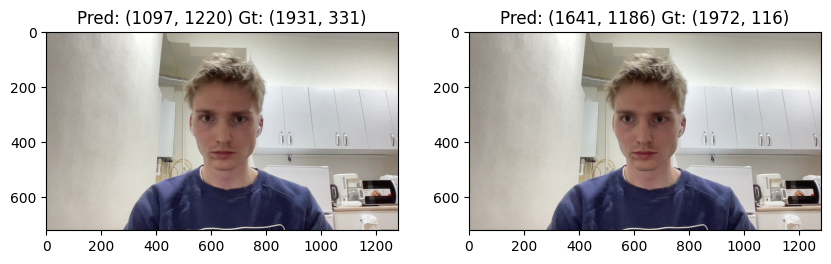

In [371]:
plt.figure(figsize=(10, 15))
plt.subplot(1, 2, 1)
plt.title(f"Pred: ({round(df.loc[i1, 'pred_x_abs'])}, {round(df.loc[i1, 'pred_y_abs'])}) "
          f"Gt: ({round(df.loc[i1, 'x_gt'])}, {round(df.loc[i1, 'y_gt'])})")
plt.imshow(img1)
plt.subplot(1, 2, 2)
plt.title(f"Pred: ({round(df.loc[i2, 'pred_x_abs'])}, {round(df.loc[i2, 'pred_y_abs'])}) "
          f"Gt: ({round(df.loc[i2, 'x_gt'])}, {round(df.loc[i2, 'y_gt'])})")
plt.imshow(img2)
plt.show()